In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import librosa as la 
import datetime

In [2]:
TriggerDf = pd.read_csv('data/recordtrigger_2019.02.21_22.19.50.tsv',sep='\t')

times = TriggerDf['timestamp']

TriggerDf['ptimes'] = [d[11:] for d in times.get_values()]

In [3]:
TriggerDf

,event,value,timestamp,ptimes
0,midi.control028,127.0,2019-02-21T22:19:54.644684,22:19:54.644684
1,eegsync.synchronize,158750.0,2019-02-21T22:19:57.896928,22:19:57.896928
2,soundsync.synchronize,28003500.0,2019-02-21T22:20:00.749200,22:20:00.749200
3,controlsync.synchronize,12700.0,2019-02-21T22:20:01.250850,22:20:01.250850
4,eegsync.synchronize,317500.0,2019-02-21T22:20:02.881250,22:20:02.881250
5,controlsync.synchronize,25400.0,2019-02-21T22:20:07.553597,22:20:07.553597
6,eegsync.synchronize,476250.0,2019-02-21T22:20:07.908410,22:20:07.908410
7,soundsync.synchronize,56007000.0,2019-02-21T22:20:07.998310,22:20:07.998310
8,eegsync.synchronize,635000.0,2019-02-21T22:20:12.896877,22:20:12.896877
9,controlsync.synchronize,38100.0,2019-02-21T22:20:13.818229,22:20:13.818229


In [4]:
timestamps_ms = []
for curts in TriggerDf['timestamp']:    
    year = int(curts[:4])
    month = int(curts[5:7])
    day = int(curts[8:10])
    hour = int(curts[11:13])
    minute = int(curts[14:16])
    second = int(curts[17:19])
    microsec = int(curts[20:28])

    #print(curts)
    
    curts_ms = microsec
    curts_ms += 1000000*second
    curts_ms += minute*60*1000000
    curts_ms += hour * 3600 * 1000000
    
    #print(curts_ms)
    timestamps_ms.append(curts_ms)
TriggerDf['timestamp_ms'] = timestamps_ms

In [5]:
TriggerDf

,event,value,timestamp,ptimes,timestamp_ms
0,midi.control028,127.0,2019-02-21T22:19:54.644684,22:19:54.644684,80394644684
1,eegsync.synchronize,158750.0,2019-02-21T22:19:57.896928,22:19:57.896928,80397896928
2,soundsync.synchronize,28003500.0,2019-02-21T22:20:00.749200,22:20:00.749200,80400749200
3,controlsync.synchronize,12700.0,2019-02-21T22:20:01.250850,22:20:01.250850,80401250850
4,eegsync.synchronize,317500.0,2019-02-21T22:20:02.881250,22:20:02.881250,80402881250
5,controlsync.synchronize,25400.0,2019-02-21T22:20:07.553597,22:20:07.553597,80407553597
6,eegsync.synchronize,476250.0,2019-02-21T22:20:07.908410,22:20:07.908410,80407908410
7,soundsync.synchronize,56007000.0,2019-02-21T22:20:07.998310,22:20:07.998310,80407998310
8,eegsync.synchronize,635000.0,2019-02-21T22:20:12.896877,22:20:12.896877,80412896877
9,controlsync.synchronize,38100.0,2019-02-21T22:20:13.818229,22:20:13.818229,80413818229


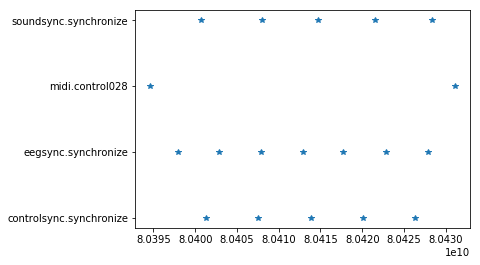

In [6]:
plt.plot(TriggerDf['timestamp_ms'],TriggerDf['event'],'*')

In [92]:
import mne

In [93]:
controlsig = mne.io.read_raw_edf('data/recordcontrol_2019.02.21_22.19.55.edf')

Extracting EDF parameters from data/recordcontrol_2019.02.21_22.19.55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
3 channel names are too long, have been truncated to 15 characters:
['controlsync.sync', 'eegsync.synchron', 'recordsignal.syn']


<ipython-input-93-dd880580708d>:1: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['controlsync.sync', 'eegsync.synchron', 'recordsignal.syn']
  controlsig = mne.io.read_raw_edf('data/recordcontrol_2019.02.21_22.19.55.edf')


In [127]:
pd = controlsig.to_data_frame()

Converting time column to int64...


In [130]:
mne.io.read_raw_edf?

In [147]:
controlsig.ch_names

['controlsync.syn',
 'eegsync.synchro',
 'mpdc003',
 'mpdc009',
 'mpdc015',
 'mpdc016',
 'mpdc017',
 'mpdc019',
 'mpdc020',
 'mpdc021',
 'mpdc022',
 'mpdc023',
 'mpdc024',
 'mpdc025',
 'mpdc026',
 'mpdc027',
 'mpdc028',
 'mpdc029',
 'mpdc030',
 'mpdc031',
 'mpdc041',
 'mpdc046',
 'mpdc047',
 'mpdc121',
 'mpdc123',
 'mpdn',
 'mpdn036',
 'mpdn037',
 'mpdn038',
 'mpdn039',
 'mpdn040',
 'mpdn041',
 'mpdn042',
 'mpdn043',
 'mpdn044',
 'mpdn045',
 'mpdn046',
 'mpdn047',
 'mpdn048',
 'mpdn049',
 'mpdn050',
 'mpdn051',
 'mpdn052',
 'mpdn053',
 'mpdn054',
 'mpdn055',
 'mpdn056',
 'mpdn057',
 'mpdn058',
 'mpdn059',
 'mpdn060',
 'mpdn061',
 'mpdn062',
 'mpdn063',
 'mpdn064',
 'mpdn065',
 'mpdn066',
 'mpdn067',
 'mpdn068',
 'mpdn069',
 'mpdn070',
 'mpdn071',
 'mpdn072',
 'mpdn073',
 'mpdn074',
 'mpdn075',
 'mpdn076',
 'mpdn077',
 'mpdn078',
 'mpdn079',
 'mpdn080',
 'mpdn081',
 'mpdn082',
 'mpdn083',
 'mpdn084',
 'mpdn085',
 'mpdn086',
 'mpdn087',
 'recordsignal.sy',
 'STI 014']

I have played a synthesizer using my controller, and recorded the audio of the synthesizer to setup how to synchronize signals

The notes end up as control signals here, and the sound is in the wav file

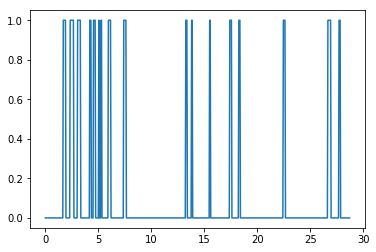

In [146]:
a,b = controlsig.get_data(picks=26,return_times=True)

plt.plot(b,a.ravel())